# Exploratory Data Analysis


In [1]:
#Imports
import gdown
import os
import logging
import pandas as pd
import seaborn as sns

In [2]:
#=========================================== DATA LOADING ===========================================

In [3]:
ROOT_FOLDER = os.path.dirname(os.getcwd())
DATA_FOLDER = ROOT_FOLDER + "/data/"

LINKS_CSV = 'links.csv'
MOVIES_CSV = 'movies.csv'
RATINGS_CSV = 'ratings.csv'
TAGS_CSV = 'tags.csv'

data_links = 'https://drive.google.com/uc?id=19cRdbSbDD4lnKAbv6nfwppRXL7kko6HT'
data_movies = 'https://drive.google.com/uc?id=14s8JDudJHGirQT3VYFwp18JBwSX3liYZ'
data_ratings = 'https://drive.google.com/uc?id=1hYYWUHk5hrDsCdj4BJG0UXBhQ_-AiZWO'
data_tags = 'https://drive.google.com/uc?id=1y7px4xin3_9KBvdAnmiz_uH0uBtPo-hH'

In [4]:
def download_from_drive(url, output_filename):
    output_filepath = DATA_FOLDER + output_filename
    if not os.path.isfile(output_filepath):
        gdown.download(url, output_filepath, quiet=True)

def read_csv_to_df(filename):
    return pd.read_csv(DATA_FOLDER + filename)

def load_data():
    # Download the dataset from the google drive so as to avoid large files in github.
    download_from_drive(data_links, LINKS_CSV)
    download_from_drive(data_movies, MOVIES_CSV)
    download_from_drive(data_ratings, RATINGS_CSV)
    download_from_drive(data_tags, TAGS_CSV)

    # Read date files from spark context
    links_df = read_csv_to_df(LINKS_CSV)
    movies_df = read_csv_to_df(MOVIES_CSV)
    ratings_df = read_csv_to_df(RATINGS_CSV)
    tags_df = read_csv_to_df(TAGS_CSV)

    return links_df, movies_df, ratings_df, tags_df

In [5]:
links_df, movies_df, ratings_df, tags_df = load_data()

In [6]:
#=========================================== Distribution by genre and ratings ===========================================

In [7]:
genres_wise_movies_df = pd.DataFrame(movies_df.genres.str.get_dummies('|').sum(), columns=['Genre'])
genres_wise_movies_df.columns

Index(['Genre'], dtype='object')

<AxesSubplot:>

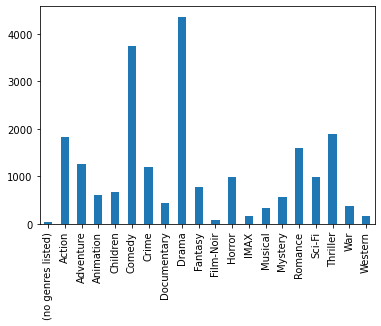

In [18]:
movies_df.genres.str.get_dummies('|').sum().plot(kind='bar')